# List comprehension in python

List comprehension is a concise syntax for making arrays in python! It is not only aesthetically pleasing as a programming tool, but allows you to make lists "on the fly", which is frequently useful for making lists as inputs to other funtions or operations that you won't need later. 

## How to do it
First let's see what a list comprehension is and its equivalent to other methods that may be more familiar. Let's first take a trivial example. Let's say we want to make a list of the numbers between 0 and 10. There are a couple equivalent ways to do this:

In [1]:
# Method 1: Manually define the list:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [2]:
# Method 2: Make a loop that adds elements to an array one by one:
y = []
for i in range(0,11):
    y.append(i)
    
y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# Method 3: List comprehension
z = [i for i in range(11)] 
# note that the last element of range is omitted, so to go to 10 we do range(11)!

z

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

As we can see, all these methods give exactly the same list. Let's break down the parts of a list comprehension, comparing it to the loop in Method 2:

1. List comprehensions go inside brackets; that's how we indicate that we are making a list
2. We make a type of loop, where we define the variable that changes in each iteration (in the above example, i), and define a for loop that in the above case, loops over the integers from 0 to 10. 

Now let's make things a little more interesting, adding operations to our list comprehension. Here are some examples:

In [4]:
x = [i**(1/2) for i in range(0,5)]
x

[0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0]

We also don't only have to loop over numeric values! We can loop similarly to any other iteration we might do in python. Below I loop through the values of a dictionary, adding each array with its elements doubled to the list x. 

In [5]:
import numpy as np

mydictionary = {'x':np.array([2,4,6]), 'y':np.array([1,3,5])}

x = [2*value for key, value in mydictionary.items()]
x

[array([ 4,  8, 12]), array([ 2,  6, 10])]

In [6]:
# let's turn the last list into a np array...
x = np.array([2*value for key, value in mydictionary.items()])
x # that looks nicer!

array([[ 4,  8, 12],
       [ 2,  6, 10]])

In [7]:
# we can use a double list comprehension if we want a list of lists...
mydictionary = {'x':[2,4,6], 'y':[1,3,5]}

x = [[2*x for x in value] for key, value in mydictionary.items()]
# Read this right to left: First we are looping over the keys and values of the dictionary.
# then for each value (the lists), we take each element, multiply it by 2, and make that
# into a list. These lists are then themselves the elements of the larger list!
x

[[4, 8, 12], [2, 6, 10]]

In [8]:
# loop over a string to separate each character:
word = 'mississippi'
x = [l for l in word]
x

['m', 'i', 's', 's', 'i', 's', 's', 'i', 'p', 'p', 'i']

We can also incorporate conditionals into our loops by tacking on the conditional expression at the end:

In [9]:
# add only the even numbers from 0 to 10
x = [x for x in range(11) if x % 2 == 0]
x

[0, 2, 4, 6, 8, 10]

In [10]:
# if a number is even, add it to the list. Otherwise put a "Odd!" in its place
# note that for if-else expressions you move the if to be before the "loop" part 
x = [x if x % 2 == 0 else 'Odd!' for x in range(11)]
x

[0, 'Odd!', 2, 'Odd!', 4, 'Odd!', 6, 'Odd!', 8, 'Odd!', 10]

Finally, we can also make dictionaries in this way! Dictionaries are objects that have keys and values; the values in this case are identified by their key instead of by their index, as in a list.

In [11]:
keys = ['name', 'age', 'program']
values = ['Henry', 60, 'ARE PhD']

{k : v for k, v in zip(keys, values)}

{'name': 'Henry', 'age': 60, 'program': 'ARE PhD'}

In [12]:
{k : 'UNKNOWN' for k in keys}

{'name': 'UNKNOWN', 'age': 'UNKNOWN', 'program': 'UNKNOWN'}

## Why use list comprehensions
List comprehensions can keep our code neat by creating unnamed lists right in the place where we need them. Let's say I want to plot some random draws from a normal distribution and plot them, but I don't need these draws for anything else. I can form the list of draws right in the code where I want to plot, without assigning them to any variable names. Let's see an example of this.

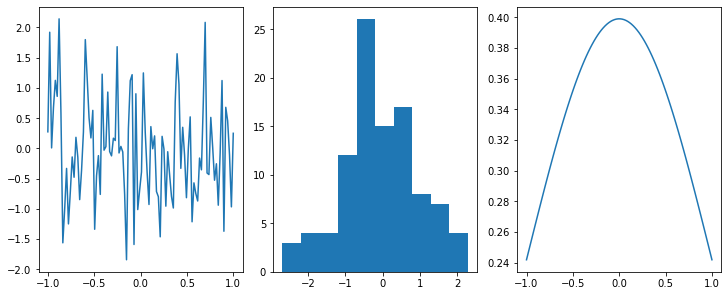

In [13]:
import scipy.stats as iid
import matplotlib.pyplot as plt

# initialize distribution
mynormal = iid.norm()

# initialize plot
fig, ax = plt.subplots(1,3,constrained_layout=True,figsize=(10,4))

N = 100

# now I'm going to make the data I want to plot with list comprehensions:
# First I'll make the x data by getting N evenly spaced points from -1, 1 with np.linspace
# then I'll make the y data by making a list of random draws from my normal distribution
ax[0].plot(np.linspace(-1,1,N), 
           [mynormal.rvs() for x in range(0, N)])

# let's make a histogram the same way:
ax[1].hist([mynormal.rvs() for x in range(0, N)])
# note that in the above list comprehensions, the elements of the list don't end up depending 
# on the "x" in the loop; I just use the loop to get N elements. 

# now let's do something similar, but plot the PDF at different points
# so that we can see an example of where the elements of the list DO depend on the loop
ax[2].plot(np.linspace(-1,1,N),
           [mynormal.pdf(x) for x in np.linspace(-1,1,N)])


These are just a few examples of the many ways that list comprehensions can be used. Try some out in your own code to get the hang of them!